In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
num_vars = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df_num = df[num_vars]

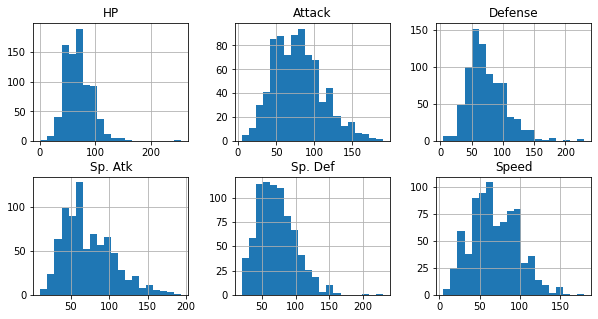

In [5]:
df_num.hist(layout=(2,3), figsize=(10,5), bins=20);

In [6]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

In [9]:
pca = PCA(n_components=5, svd_solver='full')
pca.fit(df_num)
df_pca = pca.transform(df_num)

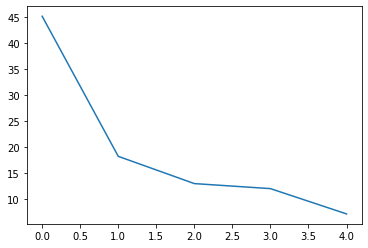

In [11]:
plt.plot(pca.explained_variance_ratio_ * 100);

In [12]:
np.sum(pca.explained_variance_ratio_ * 100)

95.54853406219935

In [13]:
components = pd.DataFrame(pca.components_,
                          columns = num_vars,
                          index=pca.explained_variance_ratio_.round(4) * 100)
#components["VARIANCE"] = pca.explained_variance_ratio_ * 100
components

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
45.19,0.389886,0.439254,0.363747,0.457162,0.448570,0.335440
18.23,0.084835,-0.011825,0.628789,-0.305414,0.239097,-0.668463
12.98,-0.471926,-0.594153,0.069339,0.305612,0.565594,0.078513
12.01,0.717691,-0.405836,-0.419237,0.147517,0.185445,-0.297163
7.14,0.219991,-0.190255,0.059032,-0.735345,0.300200,0.530161


In [14]:
components.T.style.bar(align='mid', color=['#d65f5f', '#5fba7d'],vmin=-1,vmax=1)


,45.190000000000005,18.23,12.98,12.01,7.140000000000001
HP,0.389886,0.084835,-0.471926,0.717691,0.219991
Attack,0.439254,-0.011825,-0.594153,-0.405836,-0.190255
Defense,0.363747,0.628789,0.069339,-0.419237,0.059032
Sp. Atk,0.457162,-0.305414,0.305612,0.147517,-0.735345
Sp. Def,0.448570,0.239097,0.565594,0.185445,0.300200
Speed,0.335440,-0.668463,0.078513,-0.297163,0.530161


In [31]:
components.T.iloc[:, 0:2]

,45.19,18.23
HP,0.389886,0.084835
Attack,0.439254,-0.011825
Defense,0.363747,0.628789
Sp. Atk,0.457162,-0.305414
Sp. Def,0.448570,0.239097
Speed,0.335440,-0.668463


In [16]:
origin = np.zeros(6)

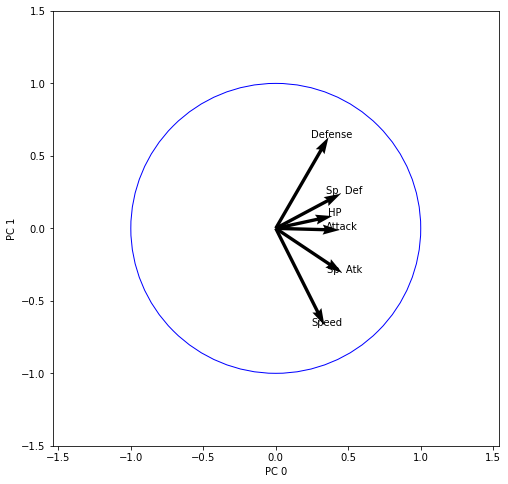

In [53]:
# https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib
# https://benalexkeen.com/principle-component-analysis-in-python/

fig = plt.figure(figsize=(8,8))

# Draw vectors
plt.quiver(origin, origin, components.T.iloc[:, 0], components.T.iloc[:, 1],
           angles='xy', scale_units='xy', scale=1,);


# Add labels based on feature names
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, num_vars):
    plt.text(j, i, z, ha='center', va='center')
    
    
# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Scatter points
plt.scatter(x=df_num[:,0], y=df_num[:,1])

plt.axis('equal')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])


# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# Done
plt.show()

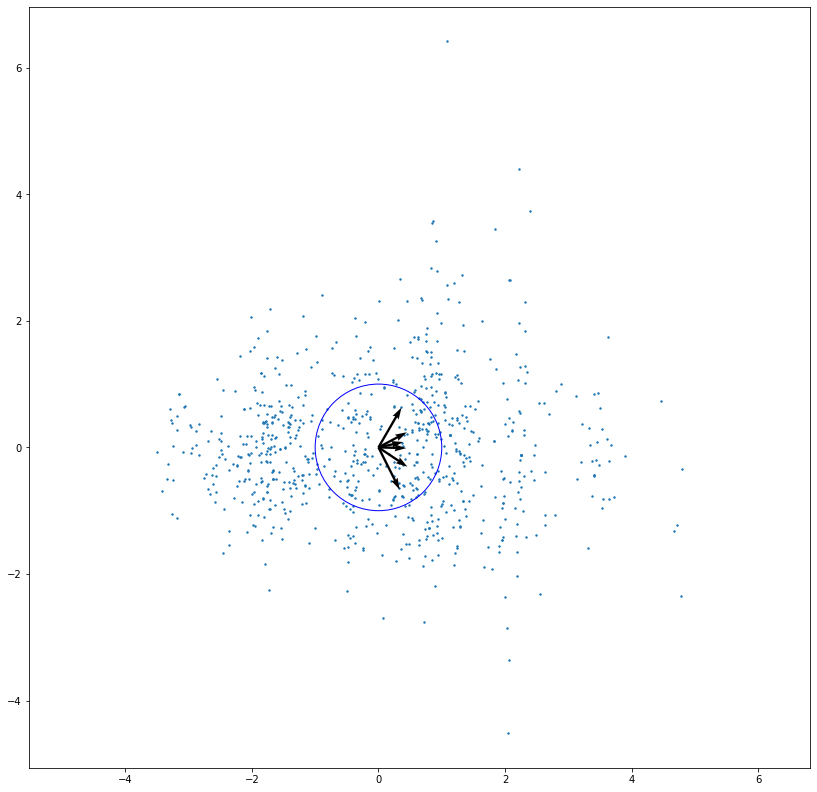

In [41]:
fig = plt.figure(figsize=(14,14))

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Draw pca points
plt.scatter(x=df_pca[:,0], y=df_pca[:,1], s=2)

# Draw vectors
plt.quiver(origin, origin, components.T.iloc[:, 0], components.T.iloc[:, 1],
           angles='xy', scale_units='xy', scale=1, width=0.003 ) #linewidths=0.005

plt.axis('equal')
plt.show()